<a href="https://colab.research.google.com/github/abkerper/project_chd/blob/main/kiera_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 2 - Coronary Heart Disease**

Kiera Murphy, Allison Kerper, Connor Overby, Annika Richardson, Taylor ____

In [ ]:
! git clone https://github.com/DS3001/project_chd

Cloning into 'project_chd'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 16 (delta 6), reused 6 (delta 4), pack-reused 6
Receiving objects: 100% (16/16), 754.81 KiB | 9.93 MiB/s, done.
Resolving deltas: 100% (6/6), done.


Coronary Heart disease is a major cause of death worldwide. Understanding the factors that contribute to this disease can help to mitigate risk factors and help inform individuals about when to start looking for warning signs that arise from this condition.

The Framingham Heart Study provides information on key demographic and medical data for a large set of individuals, as well as the likelihood of whether they will develop Coronary heart disease within the next 10 years. Obviously, the factors contributing to heart disease are hard to pinpoint, but utilizing this dataset to build models relating to the disease can help to understand any individual and interactive effects within the variables of the study. To best analyze these relationships, we have decided to use linear regression models against both a training and test set to best understand, and hopefully validate, trends within the data.


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df_train = pd.read_csv('./project_chd/fhs_train.csv')
df_train = df_train.dropna()
df_train.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0
6,1054,0,54,1.0,0,0.0,0.0,0,1,0,237.0,171.5,105.5,34.25,91,104.0,0


In [ ]:
df_test = pd.read_csv('./project_chd/fhs_test.csv')
df_test = df_test.dropna()
df_test.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,4070,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
4,2692,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0
5,357,1,53,1.0,0,0.0,0.0,0,1,0,202.0,140.5,90.0,25.82,85.0,74.0,0
6,632,1,41,2.0,1,5.0,0.0,0,0,0,218.0,129.5,93.0,27.80,58.0,83.0,0
7,2090,1,50,4.0,1,35.0,0.0,0,0,0,236.0,102.0,69.0,21.98,70.0,73.0,0


In order to clean the data to prepare it for regression, we dropped all rows with nan values so that all columns would have the same number or rows.


In [ ]:
X_train = df_train.drop('TenYearCHD', axis = 1)
y_train = df_train['TenYearCHD']


X_test = df_test.drop('TenYearCHD', axis = 1)
y_test = df_test['TenYearCHD']
X_train.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0
6,1054,0,54,1.0,0,0.0,0.0,0,1,0,237.0,171.5,105.5,34.25,91,104.0


Our dependent variable as *TenYearCHD* is a dummy variable that indicates whether the individual is at risk of developing Coronary Heart Disease within 10 years. We performed our initial regression by regressing *TenYearCHD* on all the other variables in the dataset because we determined that all the variables together most accurately predict *TenYearCHD*.

In [ ]:
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X_train, y_train)) # R squared measure

-0.5817477641538951
[-5.21341105e-06  6.65938151e-02  7.06849908e-03 -3.30116486e-03
 -1.08760718e-02  2.56282895e-03  7.48705130e-02  1.07377402e-01
  2.20456604e-02  5.39144241e-02  3.32541529e-04  2.42411267e-03
 -1.55659150e-03 -6.19584314e-04 -1.67228382e-05  1.10096960e-03]
0.1022089143407846


All regression coefficients are now relative to *TenYearCHD* since we dropped that variable.

In [ ]:
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error: 0.1130
R^2 Score: 0.0910


The r squared value in our regression on the training data was .1022, which was very similar to the r squared value when predicting the test data, which was .0910.

We knew we could improve our r square value and creat a regression that better predicts the risk of coronary heart disease. We performed another regression where we took interacted variables that we believe to be related to eachother. Individuals with higher BMI are likely to have higher blood pressure. We created a new variable that interacts *BMI* and *sysBP*. Additionally, the risk of hypertension increases with age, so we created a new variable that interacts *age* and *prevalentHyp*. We performed a new regression that included these interaction terms to arrive at a more desirable and effective r^2 value.


In [ ]:
X_train['BMI_sysBP'] = X_train['BMI']*X_train['sysBP']
X_test['BMI_sysBP'] = X_test['BMI']*X_test['sysBP']

X_train['age_prevalentHyp'] = X_train['age']*X_train['prevalentHyp']
X_test['age_prevalentHyp'] = X_test['age']*X_test['prevalentHyp']

X_train.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,BMI_sysBP,age_prevalentHyp
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,4268.550,0
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,2703.520,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,3107.000,38
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,2636.240,0
6,1054,0,54,1.0,0,0.0,0.0,0,1,0,237.0,171.5,105.5,34.25,91,104.0,5873.875,54


In [ ]:
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X_train, y_train)) # R squared measure

-0.5317707086185156
[-5.37711473e-06  7.00638629e-02  5.88542122e-03 -2.80242236e-03
 -1.16446555e-02  2.60483425e-03  6.94138187e-02  9.69391867e-02
 -1.78347293e-01  5.15650981e-02  3.59373628e-04  2.19130275e-03
 -1.27759760e-03 -5.90704419e-04 -2.08409067e-05  1.11885033e-03
  1.01060637e-06  3.92528188e-03]
0.10381056646895104


In [ ]:
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error: 0.1128
R^2 Score: 0.0931


Using the method described above, the r squared value on the training data improved slightly to .1038. The prediction of the test data also had an improved r squared of .0931. However, we determined that there may be a nonlinear relationship between the numeric variables in the dataset and the dependent variable, so we took the log of the numeric variables and performed another regression that includes the logged variables.

In [ ]:
X_train['totChol_log'] = np.log(X_train['totChol'])
X_train['glucose_log'] = np.log(X_train['glucose'])
X_train['heartRate_log'] = np.log(X_train['heartRate'])
X_train['BMI_log'] = np.log(X_train['BMI'])
X_train['diaBP_log'] = np.log(X_train['diaBP'])
X_train['sysBP_log'] = np.log(X_train['sysBP'])



X_test['totChol_log'] = np.log(X_test['totChol'])
X_test['glucose_log'] = np.log(X_test['glucose'])
X_test['heartRate_log'] = np.log(X_test['heartRate'])
X_test['BMI_log'] = np.log(X_test['BMI'])
X_test['diaBP_log'] = np.log(X_test['diaBP'])
X_test['sysBP_log'] = np.log(X_test['sysBP'])

X_train.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,heartRate,glucose,BMI_sysBP,age_prevalentHyp,totChol_log,glucose_log,heartRate_log,BMI_log,diaBP_log,sysBP_log
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,...,75,87.0,4268.550,0,5.393628,4.465908,4.317488,3.396185,4.644391,4.962845
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,...,85,77.0,2703.520,0,5.293305,4.343805,4.442651,3.098289,4.406719,4.804021
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,...,110,75.0,3107.000,38,5.135798,4.317488,4.700480,3.173878,4.543295,4.867534
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,...,75,74.0,2636.240,0,5.308268,4.304065,4.317488,3.056827,4.521789,4.820282
6,1054,0,54,1.0,0,0.0,0.0,0,1,0,...,91,104.0,5873.875,54,5.468060,4.644391,4.510860,3.533687,4.658711,5.144583


In [ ]:
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X_train, y_train)) # R squared measure

9.300532235219357
[-5.68911623e-06  7.57545943e-02  6.32884722e-03 -1.52558564e-03
 -1.59477219e-02  2.62971689e-03  5.81340738e-02  9.74414324e-02
 -1.80578540e-01  1.20512589e-02  2.87642391e-03  8.92763944e-03
  1.33484935e-02  5.82346333e-02 -2.05350624e-03  3.08802899e-03
 -1.73069800e-04  3.86471028e-03 -5.96658864e-01 -2.26561682e-01
  1.59917233e-01 -9.12617914e-01 -1.21260457e+00 -3.33492286e-01]
0.11234810688176655


In [ ]:
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error: 0.1113
R^2 Score: 0.1045


Including this new feature into the model improved r^2 to .1123 and .1045 for the training model and testing prediction, respectively. Ultimatley we arrived at this conclusion that this was a very effective model for this data set on coronary heart disease prediction. It is likely that there are many additional factors that contribute to the presense of this disease in individuals in addition to certain situational factors that are less easily measured in the form of data.

<Axes: ylabel='Density'>

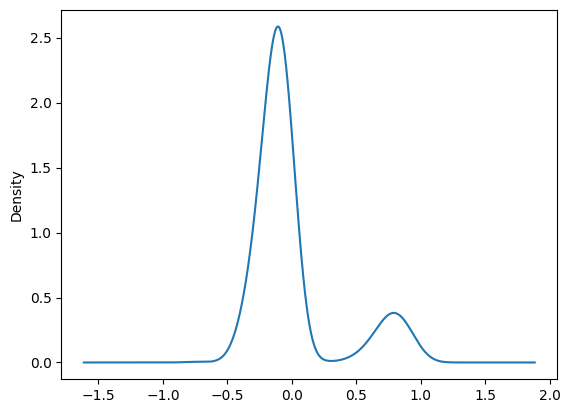

In [ ]:
residual = y_test-y_pred
residual.plot.kde() # Plot residuals


The residuals plot is bimodal with a right tail. When ignoring the right small peak, the plot is fairly symmetric around 0 and bell shaped. The right peak is likely an element of the data, but it is possible that with a different statistical split, that element would not be present in the plot.

**CONCLUSION**

When looking at the linear regressions that we completed for the determinants of Coronary Heart Disease, it became evident that the relationship between the disease and the variables included in the survey do have a correlation; however, the relationship between them is not purely linear. It was not until we included logarithmic adjustments and interaction terms that we were able to achieve an acceptable value for the correlation coefficient, R squared.

Although this means that the regression that we were able to achieve is not perfect enough to use in a medical setting, it is still important to look at the coefficients that we discovered on each of the variables that we tested. In order to convey strong, clear, and convincing evidence, a very high r^2 value would be required. Factors that had large positive coefficients are likely influential on the prevalence of CHD and therefore should be especially avoided when considering the risk factors of the disease. In these regressions, we can tell the direction of the variables since there are likely enough variables to appropriately fit the model, however the problem of heteroscedasticity does influence the interpretation of the coefficients. The implication of this could be overinflated values or instances of multicollinearity.

Since the model we built is a linear regression, it is important to consider the effects of heteroskedasticity on our model. It is highly likely that the variance between the explanatory variables and our error term was not constant throughout the wide range of variables that we included in the model. Simply due to the nature of the variables tested and the plethora of other untested variables that could contribute to CHD, homoscedasticity was nearly impossible. However, since the R squared value is not impacted directly by homoscedasticity in the model, and the dependent variable included in each model is the same, the metric is still a valid comparison between the different regressions that we tested. In order to compare other metrics, we likely would have to calculate the heteroskedastic robust standard errors and coefficients.

Other variables not included in the survey that could provide an interesting additional piece of information to this data set could be the prevalence of heart conditions in other family members/parents, external stressors, general diet and more specific drug use patterns, as well as certain medications (ex. Blood thinners) that are being used. Having data on these values could help build a more robust regression and achieve better outcomes for our linear model.